## Lab Notebook - Rift Inversion Project ##
This Jupyter notebooks serves as a record of modeling runs done on Stampede2 as part of the rift inversion project. Each cell includes a note of the current modeling goal and the code to generate the resulting models, as well as a report on the model results.

__NOTE__: Never run all cells, model inputs are designed to be temporary

In [2]:
import ripropagate

# Key function: generate
# Parameters in generate: lthick,evel,etime,output,ver,soft,shell,file

## 11/1/2021 ##
* Finished rifting of model with new inflow/outflow scheme (1025b) - making inversion for that now

In [2]:
ripropagate.generate(etime=32.5,evel=-1,output='./110121_ri_a',file='ri_base_iso_inflow.prm',soft=0.375,shell='run_base_nal.sh',
                    ver='a')

* Fastscape model with marine turned on crashed very quickly. Need to take a closer look at parameters.
* Made some changes after suggestions from Derek, going to try that out again.

In [3]:
ripropagate.generate(etime=12.5,evel=1,output='./110121_ri_b',file='ri_base_fs.prm',soft=0.375,shell='run_base_fsr.sh',
                    ver='b')

## 11/4/2021 ##
* Fastscape model (1101b) actually rifted successfully - trying the inversion next.

In [2]:
ripropagate.generate(etime=32.5,evel=-1,output='./110421_ri',file='ri_base_fs.prm',soft=0.375,shell='run_base_fsr.sh')

## 11/10/2021 ##
* Inversions of inflow and fastscape models proceeding. Finished inverting 2 isosurfaces model.
* Adding larger model domain to inflow model to see if it helps with edge effects

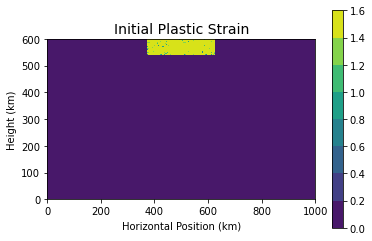

In [5]:
ripropagate.generate(etime=12.5,evel=1,output='./111021_ri',file='ri_base_iso_inflow_large.prm',soft=0.375,shell='run_base_fsr.sh',
                    depth=600)
ripropagate.comp_ascii(y=600,output='./111021_ri')

## 11/11/2021 ##
* Realized problem is persisting even with the new outflow scheme - going to try reverting back to cell averaging instead.

In [2]:
ripropagate.generate(etime=12.5,evel=1,output='./111121_ri_a',file='ri_base.prm',soft=0.375,shell='run_base_nal.sh',ver='a')

* Also doing a version of this with 1 km resolution throughout.

In [3]:
ripropagate.generate(etime=12.5,evel=1,output='./111121_ri_b',file='ri_base_hires.prm',soft=0.375,shell='run_base_nal.sh',ver='b')

## 11/17/2021 ##
* 1111a finished, so going to invert that.
* But also need to try this with the new inflow scheme, so adding that.
* 1111b is super slow, so not going to continue with that at the moment.

In [3]:
ripropagate.generate(etime=32.5,evel=-1,output='./111721_ri_a',file='ri_base.prm',soft=0.375,shell='run_base_nal.sh',ver='a')
ripropagate.generate(etime=12.5,evel=1,output='./111721_ri_b',file='ri_base_inflow.prm',soft=0.375,shell='run_base_nal.sh',ver='b')

## 11/22/2021 ##
* Discovered that 1111a went seriously wrong (rifting initialized on edge of model), so canceled 1117a. 
* 1117b almost done rifting, but also need to check that the same problem didn't occur.
* Pulling 1111b to see how hires version did as well.